### Materials - Dataset: [Health Ecommerce Website Visits](https://www.kaggle.com/rajeck/health-ecommerce-website-visits)

Conversion measures effectivity and efficiently of business in handling positive outcomes. This numbers explained a lot of things including performance of product quality, site design, ease of checkout, payment options, copywriting, marketing efficiency, and others. It can be measured by dividing consumers checkout completion along with all the number of consumers. 

Based on MarketingSherpa, benchmark for convertion rate in Healthcare industry is 8%. Meanwhile, Health Ecommerce only have 7.11% of conversion rate. Therefore, a strategy is needed to increase this number. One of which is by increasing the effectivity of advertising strategy by targeting and attracting high-intent potential buyers. This analysis will trying to understand the characteristic of potential buyers by understanding previous history of the consumers. 

Here's the sum up of the analysis goals and objective: 
  - Problem → Low conversion rates
  - Goals → Build model to predict consumers characteristic  
  - Objective → Plan a marketing strategy to to increase advertising efficiency
  - Business metric → Checkout completion


**Content materials**
1. Import libraries and load dataset
2. EDA and feature engineering 
3. Data pre-processing
4. Machine Learning Model
5. Explainable Machine Learning Model
6. Finalize Model
7. Predict on unseen data
8. Business Suggestion


## 1. Import Libraries and Load Dataset

In [1]:
#used libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load dataset
url = 'https://raw.githubusercontent.com/afidas/dataset/main/health-ecommerce-website.csv'
df = pd.read_csv(url)

In [ ]:
#view data
df.head()

,dateTime,country,profile,age,gender,referral,pageviews,purchased,purchaseAmount
0,2014-08-29 03:34,Australia,Friend/family friend,25-34,Female,Unbranded Search,9,0,0.0
1,2014-09-10 09:03,United States,Friend/family friend,25-34,Female,Unbranded Search,7,0,0.0
2,2014-08-13 22:43,United States,Friend/family friend,35-44,Female,Social,3,0,0.0
3,2014-09-05 12:37,United States,Friend/family friend,35-44,Female,Unbranded Search,7,0,0.0
4,2014-08-20 18:29,United States,Friend/family friend,45-54,Female,Unbranded Search,11,0,0.0


In [ ]:
df.shape

(1592, 9)

## 2. EDA and Feature Engineering

In this section, we will find out more about each variable that will be used in the modeling process. All the categorical data will be handling into numerical variable using frequency encoding to increase the effectivity of the model. Some of the variable will also be grouped to decreased the variance of the data.

**a. Target Variable**

Target variable of this analysis is `purchased`. It consist of two category, one and zero. One stand for "yes" which means consumers finished the transaction and "no" for unfinished order.

In [ ]:
#count of value of target variable 
target = df['purchased'].value_counts().reset_index()
target.rename(columns={'index':'purchased','purchased':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,purchased,freq,percentage
0,0,1479,92.9
1,1,113,7.1


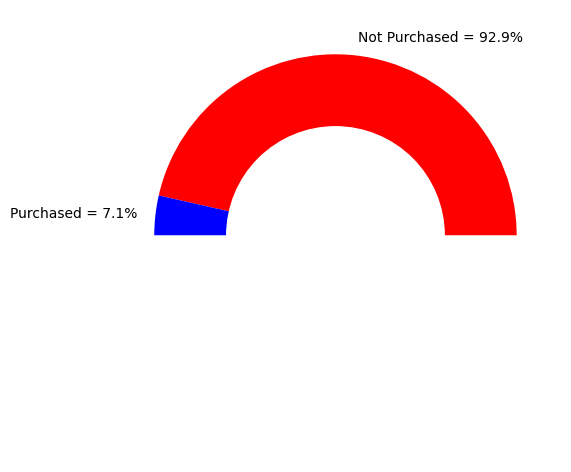

In [ ]:
# data
label = ["Not Purchased = 92.9%", "Purchased = 7.1%"]
val = [1479, 113]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'blue', 'white']

# plot
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.pie(val, labels=label, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
fig.show()

**b. Referral**

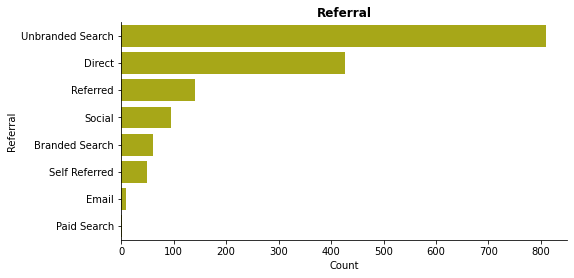

In [ ]:
#referral visualization
fig, ax = plt.subplots(figsize=(8,4))

sns.countplot(y = df['referral'], color = 'y',order = df['referral'].value_counts().index)
sns.despine()

ax.text(x=0.5, y=1.01, s='Referral', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.ylabel("Referral", fontsize=10)
plt.xlabel("Count",fontsize=10)
plt.show()

In [ ]:
#frequency encoding for referral

#count the variable category
freq_et = df['referral'].value_counts().reset_index()
freq_et.rename(columns={"index": "referral", "referral": "freq_referral"}, inplace = True)
#count variable using percentage
freq_et['pct_referral'] = round((freq_et['freq_referral']/freq_et['freq_referral'].sum())*100,2)
#add encoding data into dataset
df = df.merge(freq_et[['referral','pct_referral']], on='referral', how='inner') 
#delete original column
df = df.drop(columns=['referral'])
#show data encoding
freq_et

,referral,freq_referral,pct_referral
0,Unbranded Search,810,50.88
1,Direct,426,26.76
2,Referred,140,8.79
3,Social,95,5.97
4,Branded Search,60,3.77
5,Self Referred,50,3.14
6,Email,9,0.57
7,Paid Search,2,0.13


**c. Age**

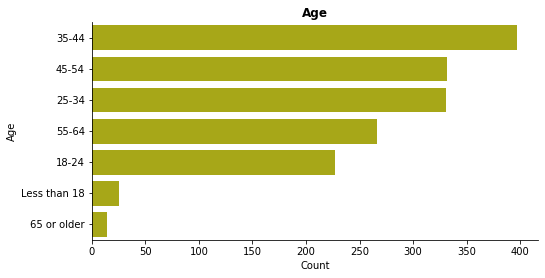

In [ ]:
#age visualization
fig, ax = plt.subplots(figsize=(8,4))

sns.countplot(y = df['age'], color = 'y',order = df['age'].value_counts().index)
sns.despine()

ax.text(x=0.5, y=1.01, s='Age', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.ylabel("Age", fontsize=10)
plt.xlabel("Count",fontsize=10)
plt.show()

In [ ]:
#frequency encoding for age

#count the variable category
freq_et = df['age'].value_counts().reset_index()
freq_et.rename(columns={"index": "age", "age": "freq_age"}, inplace = True)
#count variable using percentage
freq_et['pct_age'] = round((freq_et['freq_age']/freq_et['freq_age'].sum())*100,2) 
#add encoding data into dataset
df = df.merge(freq_et[['age','pct_age']], on='age', how='inner') 
#delete original column
df = df.drop(columns=['age'])
#view encoding data
freq_et

,age,freq_age,pct_age
0,35-44,397,24.94
1,45-54,332,20.85
2,25-34,331,20.79
3,55-64,266,16.71
4,18-24,227,14.26
5,Less than 18,25,1.57
6,65 or older,14,0.88


**d. Profile**

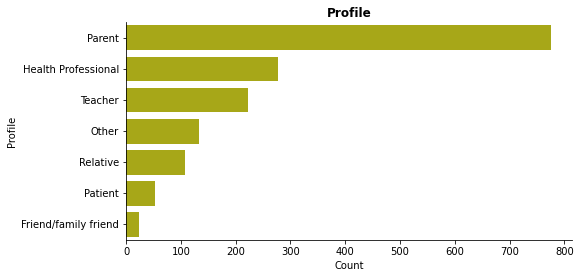

In [ ]:
#Profile viz
fig, ax = plt.subplots(figsize=(8,4))

sns.countplot(y = df['profile'], color = 'y',order = df['profile'].value_counts().index)
sns.despine()

ax.text(x=0.5, y=1.01, s='Profile', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
plt.ylabel("Profile", fontsize=10)
plt.xlabel("Count",fontsize=10)
plt.show()

In [ ]:
#frequency encoding for profile

#count the variable category
freq_et = df['profile'].value_counts().reset_index()
freq_et.rename(columns={"index": "profile", "profile": "freq_profile"}, inplace = True)
#count variable using percentage
freq_et['pct_profile'] = round((freq_et['freq_profile']/freq_et['freq_profile'].sum())*100,2) 
#add encoding data into dataset
df = df.merge(freq_et[['profile','pct_profile']], on='profile', how='inner')
#delete original column
df = df.drop(columns=['profile'])
#view encoding data
freq_et

,profile,freq_profile,pct_profile
0,Parent,776,48.74
1,Health Professional,277,17.40
2,Teacher,223,14.01
3,Other,134,8.42
4,Relative,107,6.72
5,Patient,52,3.27
6,Friend/family friend,23,1.44


**d. Country**

In [ ]:
#country distribution
df['country'].value_counts().reset_index()

,index,country
0,United States,1360
1,Canada,62
2,Australia,50
3,United Kingdom,31
4,India,13
5,South Africa,8
6,Puerto Rico,6
7,Israel,4
8,Netherlands,4
9,United Arab Emirates,4


`country` has many categories. There's also an unbalanced frequency between them. It will complicate the analysis process. Each categories need to be grouped by continent to make the analysis easier.

In [ ]:
#grouping country by continent
country_map={"Barbados":"America",
               "Botswana":"Africa",
               "Brazil":"America",
               "Canada" : "America",
               'Colombia': "America",
               'Costa Rica' : 'America',
               'Denmark' : "Europe",
               'France': "Europe",
               'Germany': "Europe",
               'Haiti' : "America",
               'India' : 'Asia',
               'Ireland': 'Europe',
               'Israel' : 'Asia',
               'Italy' : "Europe",
               'Japan' : 'Asia',
               'Kuwait':'Asia',
               'Malaysia':'Asia',
               'Malta':'Asia',
               'Mexico': "America",
               'Namibia': "Africa",
               'Netherlands' : "Europe",
               'New Zealand': 'Australia',
               'Nigeria':'Africa',
               'Norway' : "Europe",
               'Panama' : "America",
               'Philipines' : 'Asia',
               'Poland' : "Europe",
               'Portugal' : "Europe",
               'Puerto Rico':'America',
               'Romania':'Europe',
               'Saudia Arabia' : 'Asia',
               'Singapore' : 'Asia',
               'Slovenia' : 'Europe',
               'South Africa':'Africa',
               'Spain' : 'Europe',
               'Sweden' : 'Europe',
               'Thailand' : 'Asia',
               'Trinidad and Tobago':'America',
               'Turkey' : 'Europe',
               'Ukraine' : 'Europe',
               'United Arab Emirates' : 'Asia',
             'Australia':'Australia',
             'United Kingdom':'Europe',
             'United States':'America' 
               }
#change dataset
df['country'] = df['country'].map(country_map)

In [ ]:
#frequency encoding for country

#count the variable category
freq_et = df['country'].value_counts().reset_index()
freq_et.rename(columns={"index": "country", "country": "freq_country"}, inplace = True)
#count variable using percentage
freq_et['pct_country'] = round((freq_et['freq_country']/freq_et['freq_country'].sum())*100,2)
#add encoding data into dataset
df = df.merge(freq_et[['country','pct_country']], on='country', how='inner')
#delete original column
df = df.drop(columns=['country'])
#view data encoding
freq_et

,country,freq_country,pct_country
0,America,1442,90.75
1,Europe,54,3.40
2,Australia,51,3.21
3,Asia,30,1.89
4,Africa,12,0.76


**e. Datetime**

Datetime format will be easier to analyze by separating date, month, year, and time in several separate categories.

In [ ]:
#change dateTime data type
df['dateTime'] =  pd.to_datetime(df['dateTime']) 
#separate datetime by date, month, year, and time
df['day'] = df['dateTime'].dt.day
df['month'] = df['dateTime'].dt.month
df['year'] = df['dateTime'].dt.year
df['time'] = df['dateTime'].dt.time
#delete daTime original column 
df = df.drop(columns=['dateTime'])
#distribution of year
print(f"Unique Value of feature year is: {df['year'].nunique()}")
print('Distribution of:', df.groupby('year').size())
#distribution of month
print(f"Unique Value of feature month is: {df['month'].nunique()}")
print('Distribution of:', df.groupby('month').size())
#distribution of day
print(f"Unique Value of feature day is: {df['day'].nunique()}")
print('distribution of:' , df.groupby('day').size())
#distribution of time
print(f"Unique Value of feature time is: {df['time'].nunique()}")
print('distribution of:', df.groupby('time').size())

Unique Value of feature year is: 1
Distribution of: year
2014    1589
dtype: int64
Unique Value of feature month is: 3
Distribution of: month
7    203
8    959
9    427
dtype: int64
Unique Value of feature day is: 31
distribution of: day
1      47
2      76
3      54
4      85
5      83
6      69
7      44
8      66
9      65
10     94
11     56
12     30
13     68
14     29
15     28
16     24
17     14
18     32
19     40
20     37
21     32
22     32
23     18
24     24
25     59
26     42
27     49
28     63
29    101
30     78
31     50
dtype: int64
Unique Value of feature time is: 877
distribution of: time
00:01:00    1
00:02:00    1
00:06:00    6
00:07:00    2
00:08:00    1
           ..
23:54:00    1
23:55:00    3
23:57:00    1
23:58:00    1
23:59:00    1
Length: 877, dtype: int64


`year` only has one category. This variable have no use in the analysis process. Meanwhile, `day` and `time` has too many variables and will be grouped to reduce variance.

In [ ]:
#grouping day to reduce variance
day_map={
    1:1,
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:2,
    8:2,
    9:2,
    10:2,
    11:2,
    12:2,
    13:3,
    14:3,
    15:3,
    16:3,
    17:3,
    18:3,
    19:4,
    20:4,
    21:4,
    22:4,
    23:4,
    24:4,
    25:5,
    26:5,
    27:5,
    28:5,
    29:5,
    30:5,
    31:5
}
#add to dataset
df['day'] = df['day'].map(day_map)


#change time data types
df['time'] = df['time'].astype(str)
#slice time by hour
df['time'] = df['time'].str[0:2]
df['time'] = df['time'].astype(int)
#divide time into four groups
df["time"] = pd.qcut(df["time"], 4)

#frequency encoding for time

#count the variable category
freq_et = df['time'].value_counts().reset_index()
freq_et.rename(columns={"index": "time", "time": "freq_time"}, inplace = True)
#count variable using percentage
freq_et['pct_time'] = round((freq_et['freq_time']/freq_et['freq_time'].sum())*100,2) 
#add encoding data into dataset
df = df.merge(freq_et[['time','pct_time']], on='time', how='inner')
#delete original column
df = df.drop(columns=['time'])
#view data encoding 
freq_et

,time,freq_time,pct_time
0,"(-0.001, 11.0]",500,31.47
1,"(14.0, 19.0]",441,27.75
2,"(19.0, 23.0]",341,21.46
3,"(11.0, 14.0]",307,19.32


**f. Page view**

In [ ]:
#understanding pageview variance
df['pageviews'].describe()

count    1589.000000
mean        6.764003
std         3.717555
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        12.000000
Name: pageviews, dtype: float64

In [ ]:
#grouping page view
view={
    1:1,
    2:1,
    3:1,
    4:2,
    5:2,
    6:2,
    7:3,
    8:3,
    9:3,
    10:4,
    11:4,
    12:4
}
#add to dataset
df['pageviews'] = df['pageviews'].map(view)

Some columns need to be removed because useless (`year`) and to reduce bias in the model (`gender`).

In [ ]:
#drop unused column
df = df.drop(columns=['year','gender','purchaseAmount'])

## 3. Data Pre-Proccessing

**a. Missing Data** 

In [ ]:
#function to check missing data
def summary(df):
    
    columns = df.columns.to_list()
    
    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

summary(df)

,column,dtypes,unique_count,missing_values,missing_percentage,total_count
0,pageviews,int64,4,0,0.0,1589
1,purchased,int64,2,0,0.0,1589
2,pct_referral,float64,8,0,0.0,1589
3,pct_age,float64,7,0,0.0,1589
4,pct_profile,float64,7,0,0.0,1589
5,pct_country,float64,5,0,0.0,1589
6,day,int64,5,0,0.0,1589
7,month,int64,3,0,0.0,1589
8,pct_time,float64,4,0,0.0,1589


**b. Multicollinearity Check** 

Based on heatmap visualization, there is no multicollinearity in dataset

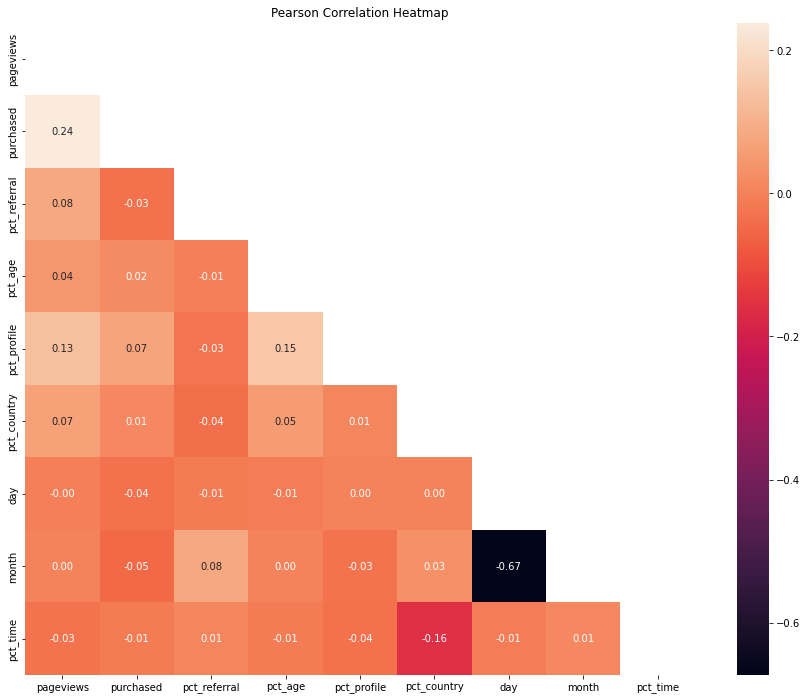

In [ ]:
#multicollinearity check with heatmap
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

**c. Outlier Check**

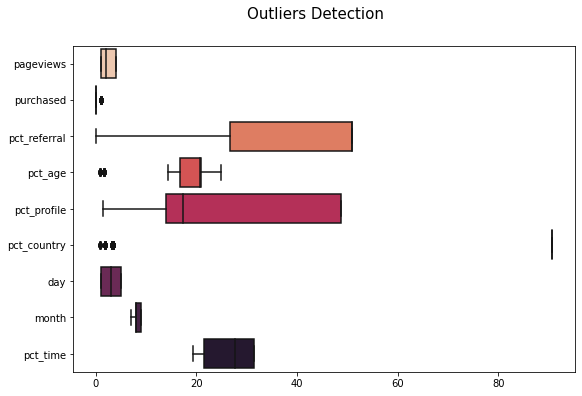

In [ ]:
#check outliers
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.boxplot(data=df, orient="h", palette="rocket_r")

title_string = "Outliers Detection"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

Most of the data are categorical. There's one only numerical data which is pageviews. Therefore, outliers is not detected in the dataset.

## 4. Machine Learning Model

Target variable of our analysis is Purchased. It contained two categorical data which is 0 for *not purchased* and 1 for *purchased*. Therefore this analysis will be categorical as **Binary Classification**. Binary classification goal is to predict categorical class labels which are discrete and unoredered including not purchased and purchased. Model will made using PyCaret classification module.

[More about Binary Classification](https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16)

Some data will be used as a demonstration to predict_model() and will be separated from a train/test split.

In [3]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1512, 9)
Unseen Data For Predictions: (80, 9)


### Baseline Model

**Setting up Environment in PyCaret** 

First step to get started with PyCaret is to install it using: 
    **Installing pycaret in Google Colab:** `pip install pycaret[full]`

In [ ]:
pip install pycaret[full]

In [ ]:
#import library
from pycaret.classification import *

The setup() function will initializes the environment for modelling the data. It takes some parameters, such as:
  - Data = data for modelling 
  - Target = target variable of our analysis
  - Session id = user defined session id
  - Transformation = make data represented in Gaussian disribution (normal curve)
  - normalize data
  - Categorical feature
  - Numerical feature
  - Fix imbalance = handling data imbalance in dataset, by default data imbalance will be handling using SMOTE

In [ ]:
#categorical feature
cat_feature = ['pct_country','pct_profile','pct_age','pct_referral','day','month','pct_time','pageviews']
#setup envinronemnt in pycaret
exp_reg = setup(data, target='purchased', session_id=123, categorical_features = cat_feature, normalize = True, normalize_method= "zscore",
                fix_imbalance= True, transformation=True)

,Description,Value
0,session_id,123
1,Target,purchased
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1510, 9)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


**Comparing some model** based on several evaluation metric. It will be sorted by F1 score since data is imbalance.

In [ ]:
compare_models(sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8892,0.7645,0.2964,0.2769,0.2836,0.2251,0.2260,0.171
ridge,Ridge Classifier,0.6923,0.0000,0.7000,0.1498,0.2461,0.1474,0.2150,0.028
lda,Linear Discriminant Analysis,0.6913,0.7545,0.7000,0.1495,0.2457,0.1469,0.2144,0.040
lr,Logistic Regression,0.7188,0.7578,0.6446,0.1519,0.2452,0.1486,0.2073,0.516
svm,SVM - Linear Kernel,0.7141,0.0000,0.6143,0.1356,0.2205,0.1224,0.1831,0.038
knn,K Neighbors Classifier,0.6326,0.6616,0.6250,0.1126,0.1907,0.0819,0.1345,0.138
gbc,Gradient Boosting Classifier,0.9119,0.7317,0.1482,0.2786,0.1875,0.1472,0.1575,0.319
nb,Naive Bayes,0.3825,0.6677,0.9196,0.0956,0.1731,0.0529,0.1425,0.028
lightgbm,Light Gradient Boosting Machine,0.9119,0.7163,0.1214,0.2933,0.1682,0.1283,0.1450,0.176
xgboost,Extreme Gradient Boosting,0.9053,0.6873,0.1357,0.2269,0.1662,0.1211,0.1267,6.383


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

Based on several model above, Ada Boost is the most highest model based on F1 score but its recall value is lower than Linear Discriminant Analysis. For that reason, **Linear Discriminant Analysis** is the most effective model to used.

### Create Model

In [ ]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5943,0.6046,0.4286,0.0714,0.1224,0.0104,0.0176
1,0.7736,0.8817,0.7143,0.1852,0.2941,0.2114,0.2805
2,0.6698,0.8444,1.0000,0.1860,0.3137,0.2136,0.3458
3,0.6792,0.6046,0.5000,0.1176,0.1905,0.0778,0.1097
4,0.6792,0.7474,0.6250,0.1389,0.2273,0.1184,0.1722
5,0.7075,0.8482,0.8750,0.1892,0.3111,0.2135,0.3152
6,0.6952,0.7828,0.7143,0.1429,0.2381,0.1429,0.2160
7,0.7905,0.8440,0.8571,0.2222,0.3529,0.2763,0.3669
8,0.6381,0.5787,0.5714,0.1026,0.1739,0.0686,0.1106
9,0.6857,0.8083,0.7143,0.1389,0.2326,0.1361,0.2091


In [ ]:
print(lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


### Tuning the model

Model will be tuned to get better performance. Since I want to make sure if the model will predicting the criteria of consumers who make purchases correctly, then this process tries to optimize the F1 score. Other parameters in tuning process is n_iter (more iteration will do good to the model), choose_better (it will return to the input model if hyperparameter tuning doesn't improve the performance)


In [ ]:
tuned = tune_model(lda, n_iter=100, optimize="f1", choose_better=True, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5943,0.6046,0.4286,0.0714,0.1224,0.0104,0.0176
1,0.7736,0.8817,0.7143,0.1852,0.2941,0.2114,0.2805
2,0.6698,0.8418,1.0000,0.1860,0.3137,0.2136,0.3458
3,0.6792,0.6046,0.5000,0.1176,0.1905,0.0778,0.1097
4,0.6792,0.7474,0.6250,0.1389,0.2273,0.1184,0.1722
5,0.7075,0.8495,0.8750,0.1892,0.3111,0.2135,0.3152
6,0.6952,0.7828,0.7143,0.1429,0.2381,0.1429,0.2160
7,0.7905,0.8440,0.8571,0.2222,0.3529,0.2763,0.3669
8,0.6476,0.5743,0.5714,0.1053,0.1778,0.0735,0.1165
9,0.6857,0.8069,0.7143,0.1389,0.2326,0.1361,0.2091


### Evaluate Model

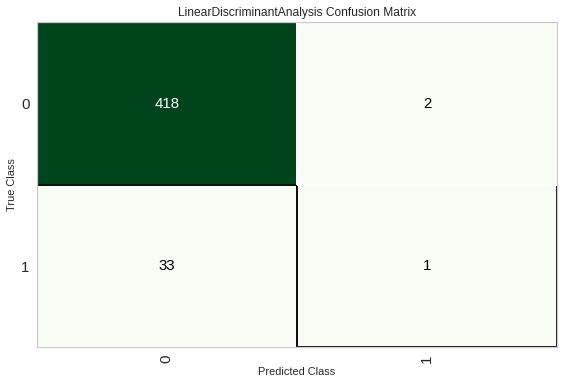

In [ ]:
plot_model(tuned, plot = 'confusion_matrix')

Here's the summary of **Confusion Matrix** above: 
- **True Positive (TP) = 418** 
  
  Consumers didn't make a purchased and predicted as not making purchased

- **False Positive (FP) = 2**

  Consumers didn't make a purchased and predicted making purchased

- **False Negative (FN) = 33**

  Consumers make a purchased and predicted didn't make a purchased
  (*missed opportunity*)

- **True Negative (TN) = 1**
  
  Consumers make a purchased and predicted as making purchased

The conclusion is company will getting a purchased but loosing 33 opportunity of purchased. Therefore, we need another business evaluation on the model to increase the precision.

In [ ]:
#import dataset
url = 'https://raw.githubusercontent.com/afidas/dataset/main/health-ecommerce-website.csv'
df2 = pd.read_csv(url)

print('Mean value of Purchase Amount is', np.mean(df2['purchaseAmount']))

Mean value of Purchase Amount is 7.226959798994975


To get better understanding of the business model, we'll use the following assumption: 
    
    Mean value of purchased ammount is $7
    
    - One purchase from TN will increase revenue by $7
    - One missing opportunity by FN will decrease revenue by $7


In [ ]:
# create a custom function for business evaluation
def calculate_purchased(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (7), 0)
    fn = np.where((y_pred==1) & (y==0), -7, 0)
    return np.sum([tp,fn])

# add metric to PyCaret
add_metric('purchased', 'purchased', calculate_purchased)

Name                                                        purchased
Display Name                                                purchased
Score Function       <function calculate_purchased at 0x7fb31743bef0>
Scorer                               make_scorer(calculate_purchased)
Target                                                           pred
Args                                                               {}
Greater is Better                                                True
Multiclass                                                       True
Custom                                                           True
Name: purchased, dtype: object

In [ ]:
# compare all models
compare_models(sort='purchased')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,purchased,TT (Sec)
dummy,Dummy Classifier,0.9299,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.027
rf,Random Forest Classifier,0.9176,0.7265,0.0536,0.2833,0.0872,0.0591,0.0878,-9.1,0.583
catboost,CatBoost Classifier,0.9148,0.7088,0.1089,0.2950,0.1543,0.1177,0.1373,-11.2,8.553
gbc,Gradient Boosting Classifier,0.9119,0.7317,0.1482,0.2786,0.1875,0.1472,0.1575,-13.3,0.315
lightgbm,Light Gradient Boosting Machine,0.9119,0.7163,0.1214,0.2933,0.1682,0.1283,0.1450,-13.3,0.123
et,Extra Trees Classifier,0.9110,0.6983,0.0786,0.2200,0.1083,0.0710,0.0851,-14.0,0.571
xgboost,Extreme Gradient Boosting,0.9053,0.6873,0.1357,0.2269,0.1662,0.1211,0.1267,-18.2,5.333
ada,Ada Boost Classifier,0.8892,0.7645,0.2964,0.2769,0.2836,0.2251,0.2260,-30.1,0.168
dt,Decision Tree Classifier,0.8807,0.5387,0.1464,0.1501,0.1465,0.0841,0.0841,-36.4,0.037
lr,Logistic Regression,0.7188,0.7578,0.6446,0.1519,0.2452,0.1486,0.2073,-156.1,0.059


DummyClassifier(constant=None, random_state=123, strategy='prior')

In [ ]:
#create model
gbc= create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,purchased
0,0.9057,0.6421,0.0000,0.0000,0.0000,-0.0413,-0.0454,-21.0000
1,0.9717,0.8355,0.5714,1.0000,0.7273,0.7135,0.7447,28.0000
2,0.9340,0.7793,0.2500,0.6667,0.3636,0.3363,0.3820,7.0000
3,0.9057,0.5982,0.0000,0.0000,0.0000,-0.0311,-0.0396,-14.0000
4,0.8774,0.7270,0.1250,0.1429,0.1333,0.0677,0.0678,-35.0000
5,0.9057,0.8138,0.2500,0.3333,0.2857,0.2363,0.2391,-14.0000
6,0.8857,0.6983,0.1429,0.1429,0.1429,0.0816,0.0816,-35.0000
7,0.9333,0.8513,0.1429,0.5000,0.2222,0.1985,0.2421,0.0000
8,0.8857,0.5889,0.0000,0.0000,0.0000,-0.0588,-0.0598,-35.0000
9,0.9143,0.7821,0.0000,0.0000,0.0000,-0.0305,-0.0372,-14.0000


In [ ]:
tuned = tune_model(gbc, n_iter=50, optimize="F1", choose_better=True, fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,purchased
0,0.8302,0.5469,0.0000,0.0000,0.0000,-0.0878,-0.0905,-77.000
1,0.9340,0.8586,0.4286,0.5000,0.4615,0.4266,0.4280,0.000
2,0.9057,0.8304,0.3750,0.3750,0.3750,0.3240,0.3240,-14.000
3,0.8962,0.6371,0.2500,0.2857,0.2667,0.2111,0.2116,-21.000
4,0.8868,0.7366,0.3750,0.3000,0.3333,0.2723,0.2743,-28.000
5,0.8679,0.8386,0.3750,0.2500,0.3000,0.2303,0.2361,-42.000
6,0.9048,0.8207,0.2857,0.2857,0.2857,0.2347,0.2347,-21.000
7,0.8857,0.7872,0.4286,0.2727,0.3333,0.2742,0.2826,-35.000
8,0.8857,0.6611,0.1429,0.1429,0.1429,0.0816,0.0816,-35.000
9,0.9238,0.8207,0.4286,0.4286,0.4286,0.3878,0.3878,-7.000


In [ ]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Finalize Model

Model will be saved in order to deployed it in the unseen Data.

In [ ]:
final = finalize_model(gbc)
#Final model parameters for deployment
print(final)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## 5. Predict on unseen data

Check model performance in unseen data. It will provide two new columns. These are *label* for explained the predicted outcome and *score* to predict probability of label.

In [ ]:
unseen_predictions = predict_model(final, data=data_unseen)
unseen_predictions.tail(10)

,pageviews,purchased,pct_referral,pct_age,pct_profile,pct_country,day,month,pct_time,Label,Score
69,1,0,50.88,16.71,8.42,90.75,2,9,19.32,0,0.9914
70,2,1,50.88,24.94,48.74,90.75,1,8,19.32,0,0.9657
71,4,1,26.76,24.94,48.74,90.75,5,8,19.32,1,0.7038
72,4,0,26.76,20.85,48.74,90.75,1,9,19.32,1,0.7251
73,1,0,26.76,20.85,48.74,90.75,1,9,19.32,0,0.9869
74,4,0,50.88,14.26,48.74,90.75,3,8,19.32,0,0.7911
75,1,0,50.88,20.79,14.01,90.75,4,8,19.32,0,0.9888
76,3,0,50.88,24.94,14.01,90.75,3,8,19.32,0,0.9077
77,4,0,26.76,20.85,14.01,90.75,3,8,19.32,0,0.7911
78,1,0,50.88,16.71,14.01,90.75,2,9,19.32,0,0.9914


Check accuracy of model in predicting target variable

In [ ]:
#import library
from pycaret.utils import check_metric
#check metric
print('Accuracy in predicting targeted variable is:', check_metric(unseen_predictions['purchased'], unseen_predictions['Label'], metric = 'Accuracy'))

Accuracy in predicting targeted variable is: 0.8354


## 7. Business Suggestion

Based on previous feature importance the most importance variable in the data are country, pageviews, age, profile, and referral. Therefore these variable will be the fundamental basis for making marketing strategies.

In [ ]:
#save data for consumers which predicted will buy
predict = unseen_predictions[(unseen_predictions['Label'] == 1)]
#country
print('\n Distribution of day:\n', predict['day'].value_counts())
#pageview
print('\n Distribution of pageview:\n', predict['pageviews'].value_counts())
#profile
print('\n Distribution of profile:\n', predict['pct_profile'].value_counts())
#referral
print('\n Distribution of referral:\n', predict['pct_referral'].value_counts())


 Distribution of day:
 1    7
5    4
2    2
4    1
Name: day, dtype: int64

 Distribution of pageview:
 4    14
Name: pageviews, dtype: int64

 Distribution of profile:
 48.74    6
6.72     2
14.01    2
8.42     2
1.44     1
3.27     1
Name: pct_profile, dtype: int64

 Distribution of referral:
 50.88    11
26.76     3
Name: pct_referral, dtype: int64


Based on those analysis, potential buyers will have characteristic: 

    Profile
    - Consumers is parent

    Behaviour
    - Consumers is buying in the first six day in a month
    - Consumer's refferal are unbranded search.
    - View 10-12 pages in the website before buying



**Potential buyers distribution on data**

In [ ]:
#count of value of target variable 
target = unseen_predictions['pageviews'].value_counts().reset_index()
target.rename(columns={'index':'pageviews','pageviews':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,pageviews,freq,percentage
0,1,30,37.97
1,4,23,29.11
2,2,17,21.52
3,3,9,11.39


In [ ]:
#count of value of target variable 
target = unseen_predictions['day'].value_counts().reset_index()
target.rename(columns={'index':'day','day':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,day,freq,percentage
0,1,28,35.44
1,5,18,22.78
2,2,15,18.99
3,4,9,11.39
4,3,9,11.39


In [ ]:
#count of value of target variable 
target = unseen_predictions['referral'].value_counts().reset_index()
target.rename(columns={'index':'referral','referral':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,referral,freq,percentage
0,Unbranded Search,40,50.63
1,Direct,19,24.05
2,Referred,10,12.66
3,Self Referred,5,6.33
4,Branded Search,2,2.53
5,Social,1,1.27
6,Paid Search,1,1.27
7,Email,1,1.27


In [ ]:
#count of value of target variable 
target = unseen_predictions['profile'].value_counts().reset_index()
target.rename(columns={'index':'profile','profile':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,profile,freq,percentage
0,Parent,36,45.57
1,Health Professional,15,18.99
2,Teacher,12,15.19
3,Other,10,12.66
4,Relative,4,5.06
5,Friend/family friend,1,1.27
6,Patient,1,1.27


In [ ]:
#count of value of target variable 
target = unseen_predictions['Label'].value_counts().reset_index()
target.rename(columns={'index':'Label','Label':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Label,freq,percentage
0,0,65,82.28
1,1,14,17.72


In the simulation of predicted data containing 79 consumers with the following criteria: 
  
  - Parent: 45%
  - Unbranded Search: 50.63%
  - Day 1: 35.44%
  - Pageview 4: 29.11%

Then, we'll get 17.72% of purchased



**Understanding Parent Behavior**

In [ ]:
#encode data to make the analysis process easier
#encoding referral
view={
    50.88:'Unbranded Search',
    26.76:'Direct',
    8.79:'Referred',
    5.97:'Social',
    3.77:'Branded Search',
    3.14:'Self Referred',
    0.57:'Email',
    0.13:'Paid Search'
}
#add to dataset
unseen_predictions['referral'] = unseen_predictions['pct_referral'].map(view)
#encoding profile
view={
    48.74:'Parent',
    17.40:'Health Professional',
    14.01:'Teacher',
    8.42:'Other',
    6.72:'Relative',
    3.27:'Patient',
    1.44:'Friend/family friend'
}
#add to dataset
unseen_predictions['profile'] = unseen_predictions['pct_profile'].map(view)
#filter dataset based on profile = parent
parent = unseen_predictions[(unseen_predictions['pct_profile'] == 48.74)]
#count data
parent_behavior = parent.groupby(['pageviews', "profile", "referral"]).size().reset_index(name="Count")
parent_behavior['percent'] = (parent_behavior['Count'] / parent_behavior['Count'].sum()) * 100
#Visualization of data
fig = px.sunburst(
    data_frame = parent_behavior,
    path = ["profile", 'pageviews', "referral"],
    values = 'percent'
)
fig.show()

Parents who view Pageview 4 have referral from direct, unbranded search, and referred. Therefore, we need to maximize our performance in these channel.

## Conslusion

Based on our analysis, focusing marketing strategy in the specific customers will lead more purchased rate to increased convertion. Here's the criteria of potential buyers: 
   1. Parent
   2. Refferal is Unbranded Search 
   3. Pageview is 4 
   4. Purchased in the first 6 day of a month.

## Reference 

  1. [PyCaret classification setup](https://pycaret.readthedocs.io/en/latest/api/classification.html) 
    - [Video: Deploying Machine Learning Pipelines using PyCaret](https://www.youtube.com/watch?v=MQCzehNPqes)
    - [Video: Build classification model using PyCaret](https://www.youtube.com/watch?v=sL-4rWuEiVw)

  2. Github:
    - [Binary Classification Tutorial](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) 

  3. Evaluation Metric 
    - [ROC and AUC](https://medium.com/the-owl/evaluation-metrics-part-3-47c315e07222)

## Save Plotly Images

In [ ]:
#import library
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import plotly.graph_objects as go
from google.colab import files
fig.write_image('test.png')
files.download('test.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>